In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from datetime import date 

In [2]:
olist_sixmonths = pd.read_csv('/Users/galvanize/Documents/regression/olist/six_month_purchase.csv', sep=',')
olist_sixmonths.head()

,customer_unique_id,customer_zipcode_prefix,customer_city,customer_state,first_order,six_months_later,order_purchase_timestamp,order_id,total_order_payment
0,00053a61a98854899e70ed204dd4bafe,80410,curitiba,PR,2/28/18 11:15,8/28/18 11:15,2/28/18 11:15,44e608f2db00c74a1fe329de44416a4e,419.18
1,0005e1862207bf6ccc02e4228effd9a0,25966,teresopolis,RJ,3/4/17 23:32,9/4/17 23:32,3/4/17 23:32,ae76bef74b97bcb0b3e355e60d9a6f9c,150.12
2,00090324bbad0e9342388303bb71ba0a,13054,campinas,SP,3/24/18 14:44,9/24/18 14:44,3/24/18 14:44,85bf8863657bff31006811d45d1c8db9,63.66
3,000bfa1d2f1a41876493be685390d6d3,11095,santos,SP,9/29/17 14:46,3/29/18 14:46,9/29/17 14:46,fd61441ba2a7b57e6342862e779b10b0,46.85
4,000c8bdb58a29e7115cfc257230fb21b,31555,belo horizonte,MG,12/12/17 22:53,6/12/18 22:53,12/12/17 22:53,34801c59d6ec5c5e89bfefb6ebef314d,29.00


In [3]:
olist_sixmonths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98826 entries, 0 to 98825
Data columns (total 9 columns):
customer_unique_id          98826 non-null object
customer_zipcode_prefix     98826 non-null int64
customer_city               98826 non-null object
customer_state              98826 non-null object
first_order                 98826 non-null object
six_months_later            98826 non-null object
order_purchase_timestamp    98826 non-null object
order_id                    98826 non-null object
total_order_payment         98826 non-null float64
dtypes: float64(1), int64(1), object(7)
memory usage: 6.8+ MB


In [4]:
olist_sixmonths.groupby(['customer_unique_id']).sum()

,customer_zipcode_prefix,total_order_payment
customer_unique_id,,
0000366f3b9a7992bf8c76cfdf3221e2,7787,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,6053,27.19
0000f46a3911fa3c0805444483337064,88115,86.22
0000f6ccb0745a6a4b88665a16c9f078,66812,43.62
0004aac84e0df4da2b147fca70cf8255,18040,196.89
...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,55250,2067.42
fffea47cd6d3cc0a88bd621562a9d061,44054,84.58
ffff371b4d645b6ecea244b27531430a,78552,112.46


In [5]:
products = pd.read_csv('/Users/galvanize/Documents/regression/olist/product_name_per_order.csv', sep=',')
products.head()

,order_id,product_id,product_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,pet_shop
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,garden_tools


In [6]:
customers_bought = pd.merge(left= olist_sixmonths, right= products, left_on= 'order_id', right_on= 'order_id')
customers_bought.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111899 entries, 0 to 111898
Data columns (total 11 columns):
customer_unique_id          111899 non-null object
customer_zipcode_prefix     111899 non-null int64
customer_city               111899 non-null object
customer_state              111899 non-null object
first_order                 111899 non-null object
six_months_later            111899 non-null object
order_purchase_timestamp    111899 non-null object
order_id                    111899 non-null object
total_order_payment         111899 non-null float64
product_id                  111899 non-null object
product_name_english        111899 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 10.2+ MB


In [7]:
products_bought = customers_bought.drop(columns=['product_id'])
products_bought.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111899 entries, 0 to 111898
Data columns (total 10 columns):
customer_unique_id          111899 non-null object
customer_zipcode_prefix     111899 non-null int64
customer_city               111899 non-null object
customer_state              111899 non-null object
first_order                 111899 non-null object
six_months_later            111899 non-null object
order_purchase_timestamp    111899 non-null object
order_id                    111899 non-null object
total_order_payment         111899 non-null float64
product_name_english        111899 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 9.4+ MB


In [8]:
products_bought["product_name_counts"]= products_bought.groupby(['customer_unique_id'])['product_name_english'].transform('count')
products_bought.head()

,customer_unique_id,customer_zipcode_prefix,customer_city,customer_state,first_order,six_months_later,order_purchase_timestamp,order_id,total_order_payment,product_name_english,product_name_counts
0,00053a61a98854899e70ed204dd4bafe,80410,curitiba,PR,2/28/18 11:15,8/28/18 11:15,2/28/18 11:15,44e608f2db00c74a1fe329de44416a4e,419.18,sports_leisure,2
1,00053a61a98854899e70ed204dd4bafe,80410,curitiba,PR,2/28/18 11:15,8/28/18 11:15,2/28/18 11:15,44e608f2db00c74a1fe329de44416a4e,419.18,sports_leisure,2
2,0005e1862207bf6ccc02e4228effd9a0,25966,teresopolis,RJ,3/4/17 23:32,9/4/17 23:32,3/4/17 23:32,ae76bef74b97bcb0b3e355e60d9a6f9c,150.12,fashion_bags_accessories,1
3,00090324bbad0e9342388303bb71ba0a,13054,campinas,SP,3/24/18 14:44,9/24/18 14:44,3/24/18 14:44,85bf8863657bff31006811d45d1c8db9,63.66,bed_bath_table,1
4,000bfa1d2f1a41876493be685390d6d3,11095,santos,SP,9/29/17 14:46,3/29/18 14:46,9/29/17 14:46,fd61441ba2a7b57e6342862e779b10b0,46.85,fashion_bags_accessories,1


In [9]:
products_bought.drop_duplicates(inplace=True)
products_bought.head()

,customer_unique_id,customer_zipcode_prefix,customer_city,customer_state,first_order,six_months_later,order_purchase_timestamp,order_id,total_order_payment,product_name_english,product_name_counts
0,00053a61a98854899e70ed204dd4bafe,80410,curitiba,PR,2/28/18 11:15,8/28/18 11:15,2/28/18 11:15,44e608f2db00c74a1fe329de44416a4e,419.18,sports_leisure,2
2,0005e1862207bf6ccc02e4228effd9a0,25966,teresopolis,RJ,3/4/17 23:32,9/4/17 23:32,3/4/17 23:32,ae76bef74b97bcb0b3e355e60d9a6f9c,150.12,fashion_bags_accessories,1
3,00090324bbad0e9342388303bb71ba0a,13054,campinas,SP,3/24/18 14:44,9/24/18 14:44,3/24/18 14:44,85bf8863657bff31006811d45d1c8db9,63.66,bed_bath_table,1
4,000bfa1d2f1a41876493be685390d6d3,11095,santos,SP,9/29/17 14:46,3/29/18 14:46,9/29/17 14:46,fd61441ba2a7b57e6342862e779b10b0,46.85,fashion_bags_accessories,1
5,000c8bdb58a29e7115cfc257230fb21b,31555,belo horizonte,MG,12/12/17 22:53,6/12/18 22:53,12/12/17 22:53,34801c59d6ec5c5e89bfefb6ebef314d,29.00,bed_bath_table,1


In [27]:
customer_info = products_bought.drop(columns=['product_name_counts'])
customer_info.head()
# .groupby(['customer_unique_id'])['order_id'].transform('count')

,customer_unique_id,customer_zipcode_prefix,customer_city,customer_state,first_order,six_months_later,order_purchase_timestamp,order_id,total_order_payment,product_name_english
0,00053a61a98854899e70ed204dd4bafe,80410,curitiba,PR,2/28/18 11:15,8/28/18 11:15,2/28/18 11:15,44e608f2db00c74a1fe329de44416a4e,419.18,sports_leisure
2,0005e1862207bf6ccc02e4228effd9a0,25966,teresopolis,RJ,3/4/17 23:32,9/4/17 23:32,3/4/17 23:32,ae76bef74b97bcb0b3e355e60d9a6f9c,150.12,fashion_bags_accessories
3,00090324bbad0e9342388303bb71ba0a,13054,campinas,SP,3/24/18 14:44,9/24/18 14:44,3/24/18 14:44,85bf8863657bff31006811d45d1c8db9,63.66,bed_bath_table
4,000bfa1d2f1a41876493be685390d6d3,11095,santos,SP,9/29/17 14:46,3/29/18 14:46,9/29/17 14:46,fd61441ba2a7b57e6342862e779b10b0,46.85,fashion_bags_accessories
5,000c8bdb58a29e7115cfc257230fb21b,31555,belo horizonte,MG,12/12/17 22:53,6/12/18 22:53,12/12/17 22:53,34801c59d6ec5c5e89bfefb6ebef314d,29.00,bed_bath_table


In [28]:
customer_info['order_count'] = customer_info.groupby(['customer_unique_id'])['order_id'].transform('count')
customer_info.head()

,customer_unique_id,customer_zipcode_prefix,customer_city,customer_state,first_order,six_months_later,order_purchase_timestamp,order_id,total_order_payment,product_name_english,order_count
0,00053a61a98854899e70ed204dd4bafe,80410,curitiba,PR,2/28/18 11:15,8/28/18 11:15,2/28/18 11:15,44e608f2db00c74a1fe329de44416a4e,419.18,sports_leisure,1
2,0005e1862207bf6ccc02e4228effd9a0,25966,teresopolis,RJ,3/4/17 23:32,9/4/17 23:32,3/4/17 23:32,ae76bef74b97bcb0b3e355e60d9a6f9c,150.12,fashion_bags_accessories,1
3,00090324bbad0e9342388303bb71ba0a,13054,campinas,SP,3/24/18 14:44,9/24/18 14:44,3/24/18 14:44,85bf8863657bff31006811d45d1c8db9,63.66,bed_bath_table,1
4,000bfa1d2f1a41876493be685390d6d3,11095,santos,SP,9/29/17 14:46,3/29/18 14:46,9/29/17 14:46,fd61441ba2a7b57e6342862e779b10b0,46.85,fashion_bags_accessories,1
5,000c8bdb58a29e7115cfc257230fb21b,31555,belo horizonte,MG,12/12/17 22:53,6/12/18 22:53,12/12/17 22:53,34801c59d6ec5c5e89bfefb6ebef314d,29.00,bed_bath_table,1


In [45]:
customer_info['customer_zipcode_prefix'].value_counts()

22790    142
24220    119
22793    119
24230    117
22775    106
        ... 
75528      1
65299      1
59184      1
9992       1
28545      1
Name: customer_zipcode_prefix, Length: 14964, dtype: int64

In [56]:
product_info = customer_info[['customer_state', 'product_name_english', 'total_order_payment']]
product_info.head()

,customer_state,product_name_english,total_order_payment
0,PR,sports_leisure,419.18
2,RJ,fashion_bags_accessories,150.12
3,SP,bed_bath_table,63.66
4,SP,fashion_bags_accessories,46.85
5,MG,bed_bath_table,29.00


In [58]:
product_info.to_csv('/Users/galvanize/Documents/regression/olist/product_info.csv', encoding='utf-8', index=False)

In [38]:
# top10_customers = customer_info.nlargest(10,'order_count')
top10_states = customer_info.drop(columns=['product_name_english', 'order_id', 'order_count', 'order_purchase_timestamp', 'first_order', 'total_order_payment', 'six_months_later'])
top10_states.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 98845 entries, 0 to 111898
Data columns (total 4 columns):
customer_unique_id         98845 non-null object
customer_zipcode_prefix    98845 non-null int64
customer_city              98845 non-null object
customer_state             98845 non-null object
dtypes: int64(1), object(3)
memory usage: 6.3+ MB


In [40]:
# top10_states['state_count'] = top10_states

# top10_states.groupby(['customer_unique_id'])['customer_state'].transform('count').plot(kind='bar')

'''wanted to figure out the states that had the most purchases'''

Error in callback <function flush_figures at 0x11e75f730> (for post_execute):


KeyboardInterrupt: 

In [10]:
category_amount = products_bought[['product_name_english', 'product_name_counts']]
category_amount.head()

,product_name_english,product_name_counts
0,sports_leisure,2
2,fashion_bags_accessories,1
3,bed_bath_table,1
4,fashion_bags_accessories,1
5,bed_bath_table,1


In [11]:
# c_sum = category_amount.groupby(['product_name_english']).sum()

c_sum = category_amount.groupby('product_name_english',as_index=False)['product_name_counts'].sum()
c_sum.head()

,product_name_english,product_name_counts
0,agro_industry_and_commerce,222
1,air_conditioning,319
2,art,224
3,arts_and_craftmanship,30
4,audio,384


In [52]:
products_bought['customer_state'].value_counts()

SP    41443
RJ    12787
MG    11571
RS     5451
PR     5007
SC     3620
BA     3365
DF     2129
ES     2022
GO     2019
PE     1647
CE     1332
PA      970
MT      908
MA      736
MS      712
PB      531
PI      496
RN      483
AL      408
SE      345
TO      278
RO      244
AM      146
AC       81
AP       68
RR       46
Name: customer_state, dtype: int64

In [ ]:
plt.figure(figsize=(10, 15))
ax = sns.barplot(x="product_name_counts", y="product_name_english", data=c_sum)
plt.xlabel("Product Count")
plt.ylabel("Product Name")
plt.title("Amount of Each Product Type Ordered")

Text(0.5, 1.0, 'Amount of Each Product Type Ordered')

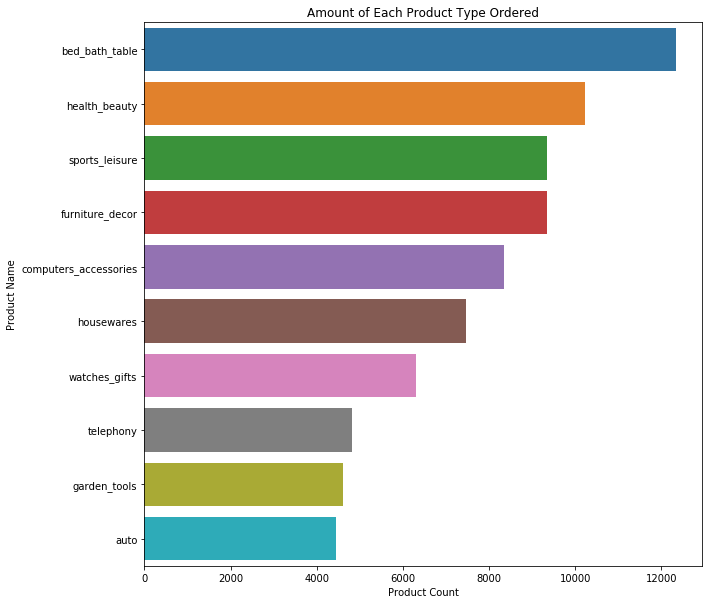

In [37]:
top10_products = c_sum.nlargest(10,'product_name_counts')
plt.figure(figsize=(10, 10))
ax = sns.barplot(x="product_name_counts", y="product_name_english", data=top10_products)
plt.xlabel("Product Count")
plt.ylabel("Product Name")
plt.title("Amount of Each Product Type Ordered")

In [44]:
formula = 'total_order_payment ~ C(customer_state)'

fitted_model = smf.ols(formula=formula, data=products_bought).fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     total_order_payment   R-squared:                       0.009
Model:                             OLS   Adj. R-squared:                  0.009
Method:                  Least Squares   F-statistic:                     35.34
Date:                 Sun, 08 Dec 2019   Prob (F-statistic):          4.49e-176
Time:                         16:19:51   Log-Likelihood:            -6.7341e+05
No. Observations:                98845   AIC:                         1.347e+06
Df Residuals:                    98818   BIC:                         1.347e+06
Df Model:                           26                                         
Covariance Type:             nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 247.4709     24.454     10.120      0.000     199.542     295.400
C(customer_state)[T.AL]   -12.3631     26.771     -0.462      0.644     -64.835      40.109
C(customer_state)[T.AM]   -57.4099     30.492     -1.883      0.060    -117.174       2.354
C(customer_state)[T.AP]    -8.3120     36.198     -0.230      0.818     -79.260      62.636
C(customer_state)[T.BA]   -64.8394     24.746     -2.620      0.009    -113.342     -16.337
C(customer_state)[T.CE]   -37.6360     25.186     -1.494      0.135     -87.001      11.729
C(customer_state)[T.DF]   -80.3642     24.915     -3.226      0.001    -129.197     -31.532
C(customer_state)[T.ES]   -86.6431     24.939     -3.474      0.001    -135.523     -37.763
C(customer_state)[T.GO]   -71.4513     24.940     -2.865      0.004    -120.333     -22.570
C(customer_state)[T.MA]   -42.9872     25.764     -1.668      0.095     -93.485       7.511
C(customer_state)[T.MG]   -85.8374     24.539     -3.498      0.000    -133.934     -37.741
C(customer_state)[T.MS]   -55.3315     25.807     -2.144      0.032    -105.914      -4.749
C(customer_state)[T.MT]   -40.6517     25.521     -1.593      0.111     -90.673       9.370
C(customer_state)[T.PA]   -21.4137     25.454     -0.841      0.400     -71.304      28.477
C(customer_state)[T.PB]    18.6012     26.253      0.709      0.479     -32.854      70.056
C(customer_state)[T.PE]   -50.8770     25.048     -2.031      0.042     -99.971      -1.783
C(customer_state)[T.PI]   -24.1193     26.375     -0.914      0.360     -75.814      27.576
C(customer_state)[T.PR]   -86.1211     24.651     -3.494      0.000    -134.437     -37.806
C(customer_state)[T.RJ]   -79.5884     24.531     -3.244      0.001    -127.669     -31.507
C(customer_state)[T.RN]   -36.3823     26.425     -1.377      0.169     -88.175      15.410
C(customer_state)[T.RO]   -10.6477     28.222     -0.377      0.706     -65.963      44.668
C(customer_state)[T.RR]   -28.6748     40.632     -0.706      0.480    -108.314      50.964
C(customer_state)[T.RS]   -83.0045     24.635     -3.369      0.001    -131.289     -34.720
C(customer_state)[T.SC]   -77.4352     24.726     -3.132      0.002    -125.898     -28.973
C(customer_state)[T.SE]   -36.0336     27.173     -1.326      0.185     -89.293      17.226
C(customer_state)[T.SP]  -103.6201     24.478     -4.233      0.000    -151.596     -55.644
C(customer_state)[T.TO]   -24.2062     27.789     -0.871      0.384     -78.672      30.260
==============================================================================
Omnibus:                   151475.714   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        238517188.961
Skew:                           9.206   Prob(JB):                         0

In [12]:
# formula = 'total_order_price ~ C(customer_zipcode_prefix) + C(customer_city)+ C(product_name_english)'

# fitted_model = smf.ols(formula=formula, data=products_bought).fit()
# fitted_model.summary()

'''Baseline should be agro_industry_and_commerce because it's in alphabetical order
All negative variables people tend to pay less for, all positive, people tend to pay more for'''

formula = 'total_order_payment ~ C(product_name_english)'

fitted_model = smf.ols(formula=formula, data=products_bought).fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     total_order_payment   R-squared:                       0.098
Model:                             OLS   Adj. R-squared:                  0.097
Method:                  Least Squares   F-statistic:                     151.0
Date:                 Sat, 07 Dec 2019   Prob (F-statistic):               0.00
Time:                         12:44:27   Log-Likelihood:            -6.6878e+05
No. Observations:                98845   AIC:                         1.338e+06
Df Residuals:                    98773   BIC:                         1.338e+06
Df Model:                           71                                         
Covariance Type:             nonrobust                                         
======================================================================================================================================
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                            432.1265     15.613     27.677      0.000     401.525     462.728
C(product_name_english)[T.air_conditioning]                         -185.9327     20.483     -9.078      0.000    -226.079    -145.787
C(product_name_english)[T.art]                                      -289.2278     21.524    -13.438      0.000    -331.414    -247.041
C(product_name_english)[T.arts_and_craftmanship]                    -334.6683     46.498     -7.197      0.000    -425.804    -243.533
C(product_name_english)[T.audio]                                    -266.0767     19.250    -13.822      0.000    -303.806    -228.348
C(product_name_english)[T.auto]                                     -255.1215     15.973    -15.972      0.000    -286.429    -223.814
C(product_name_english)[T.baby]                                     -261.5976     16.097    -16.251      0.000    -293.148    -230.047
C(product_name_english)[T.bed_bath_table]                           -297.6817     15.764    -18.884      0.000    -328.578    -266.785
C(product_name_english)[T.books_general_interest]                   -321.9888     18.169    -17.722      0.000    -357.600    -286.378
C(product_name_english)[T.books_imported]                           -329.4584     32.806    -10.043      0.000    -393.758    -265.159
C(product_name_english)[T.books_technical]                          -341.2500     20.334    -16.782      0.000    -381.104    -301.396
C(product_name_english)[T.cds_dvds_musicals]                        -352.5440     62.614     -5.630      0.000    -475.267    -229.821
C(product_name_english)[T.christmas_supplies]                       -337.4906     24.314    -13.880      0.000    -385.146    -289.835
C(product_name_english)[T.cine_photo]                               -302.5448     30.374     -9.961      0.000    -362.077    -243.013
C(product_name_english)[T.computers]                                 854.8214     22.080     38.715      0.000     811.545     898.098
C(product_name_english)[T.computers_accessories]                    -272.9063     15.824    -17.246      0.000    -303.921    -241.891
C(product_name_english)[T.consoles_games]                           -264.4471     16.897    -15.651      0.000    -297.565    -231.329
C(product_name_english)[T.construction_tools_construction]          -207.3650     17.420    -11.904      0.000    -241.509    -173.221
C(product_name_english)[T.construction_tools_lights]                -202.8132     20.642     -9.825      0.000    -243.271    -162.356
C(product_name_english)[T.construction_tools_safety]                -154.1497     22.609     -6.818   

In [13]:
formula = 'total_order_payment ~ C(product_name_english) + C(customer_state)'

fitted_model = smf.ols(formula=formula, data=products_bought).fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     total_order_payment   R-squared:                       0.106
Model:                             OLS   Adj. R-squared:                  0.105
Method:                  Least Squares   F-statistic:                     120.1
Date:                 Sat, 07 Dec 2019   Prob (F-statistic):               0.00
Time:                         12:44:35   Log-Likelihood:            -6.6836e+05
No. Observations:                98845   AIC:                         1.337e+06
Df Residuals:                    98747   BIC:                         1.338e+06
Df Model:                           97                                         
Covariance Type:             nonrobust                                         
======================================================================================================================================
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                            513.1947     27.981     18.341      0.000     458.353     568.036
C(product_name_english)[T.air_conditioning]                         -182.8692     20.402     -8.963      0.000    -222.857    -142.881
C(product_name_english)[T.art]                                      -287.1465     21.439    -13.394      0.000    -329.166    -245.127
C(product_name_english)[T.arts_and_craftmanship]                    -324.4007     46.314     -7.004      0.000    -415.175    -233.627
C(product_name_english)[T.audio]                                    -265.9266     19.175    -13.868      0.000    -303.509    -228.344
C(product_name_english)[T.auto]                                     -255.5687     15.911    -16.062      0.000    -286.754    -224.383
C(product_name_english)[T.baby]                                     -261.4502     16.035    -16.305      0.000    -292.878    -230.022
C(product_name_english)[T.bed_bath_table]                           -294.1346     15.702    -18.732      0.000    -324.911    -263.358
C(product_name_english)[T.books_general_interest]                   -322.6054     18.102    -17.821      0.000    -358.086    -287.125
C(product_name_english)[T.books_imported]                           -322.7761     32.676     -9.878      0.000    -386.820    -258.732
C(product_name_english)[T.books_technical]                          -340.3748     20.254    -16.805      0.000    -380.073    -300.677
C(product_name_english)[T.cds_dvds_musicals]                        -348.9541     62.366     -5.595      0.000    -471.190    -226.718
C(product_name_english)[T.christmas_supplies]                       -339.7995     24.221    -14.029      0.000    -387.272    -292.327
C(product_name_english)[T.cine_photo]                               -301.4336     30.254     -9.964      0.000    -360.730    -242.137
C(product_name_english)[T.computers]                                 844.5139     21.997     38.391      0.000     801.399     887.629
C(product_name_english)[T.computers_accessories]                    -273.1354     15.762    -17.328      0.000    -304.029    -242.241
C(product_name_english)[T.consoles_games]                           -264.2335     16.830    -15.700      0.000    -297.221    -231.246
C(product_name_english)[T.construction_tools_construction]          -204.6798     17.352    -11.796      0.000    -238.690    -170.670
C(product_name_english)[T.construction_tools_lights]                -200.0775     20.561     -9.731      0.000    -240.376    -159.779
C(product_name_english)[T.construction_tools_safety]                -157.3014     22.521     -6.985   

In [46]:
# r-squared 0.053

# formula = 'total_order_payment ~ C(customer_city)'

# fitted_model = smf.ols(formula=formula, data=products_bought).fit()
# fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     total_order_payment   R-squared:                       0.053
Model:                             OLS   Adj. R-squared:                  0.012
Method:                  Least Squares   F-statistic:                     1.284
Date:                 Sun, 08 Dec 2019   Prob (F-statistic):           3.58e-31
Time:                         16:37:07   Log-Likelihood:            -6.7119e+05
No. Observations:                98845   AIC:                         1.351e+06
Df Residuals:                    94735   BIC:                         1.390e+06
Df Model:                         4109                                         
Covariance Type:             nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Intercept                                              137.8333    126.891      1.086      0.277    -110.871     386.538
C(customer_city)[T.abadiania]                          887.6867    253.782      3.498      0.000     390.278    1385.096
C(customer_city)[T.abaete]                              24.4008    141.868      0.172      0.863    -253.659     302.461
C(customer_city)[T.abaetetuba]                         286.9185    143.152      2.004      0.045       6.342     567.495
C(customer_city)[T.abaiara]                             28.2417    200.632      0.141      0.888    -364.995     421.478
C(customer_city)[T.abaira]                             -36.3333    200.632     -0.181      0.856    -429.570     356.903
C(customer_city)[T.abare]                              -25.4683    200.632     -0.127      0.899    -418.705     367.768
C(customer_city)[T.abatia]                             -64.4367    179.451     -0.359      0.720    -416.158     287.285
C(customer_city)[T.abdon batista]                       18.8667    253.782      0.074      0.941    -478.542     516.276
C(customer_city)[T.abelardo luz]                        -4.9033    155.409     -0.032      0.975    -309.503     299.696
C(customer_city)[T.abrantes]                           242.8467    200.632      1.210      0.226    -150.390     636.083
C(customer_city)[T.abre campo]                         -64.3753    160.506     -0.401      0.688    -378.965     250.214
C(customer_city)[T.abreu e lima]                       169.3575    141.868      1.194      0.233    -108.703     447.418
C(customer_city)[T.acaiaca]                            -33.8833    200.632     -0.169      0.866    -427.120     359.353
C(customer_city)[T.acailandia]                          38.3781    151.664      0.253      0.800    -258.881     335.637
C(customer_city)[T.acajutiba]                          -86.8833    253.782     -0.342      0.732    -584.292     410.526
C(customer_city)[T.acarau]                              76.0095    151.664      0.501      0.616    -221.249     373.268
C(customer_city)[T.acari]                              274.5967    253.782      1.082      0.279    -222.812     772.006
C(customer_city)[T.acegua]                               3.3617    200.632      0.017      0.987    -389.875     396.598
C(customer_city)[T.acopiara]                            -9.0233    151.664     -0.059      0.953    -306.282     288.235
C(customer_city)[T.acreuna]                             48.8024    151.664      0.322      0.748    -248.456     346.061
C(customer_city)[T.acu]                                112.0300    179.451      0.624      0.532    -239.691     463.751
C(customer_city)[T.acucena]                    

In [54]:
formula = 'total_order_payment ~ C(product_name_english) + C(customer_state) + C(customer_city)'

fitted_model = smf.ols(formula=formula, data=products_bought).fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     total_order_payment   R-squared:                       0.144
Model:                             OLS   Adj. R-squared:                  0.106
Method:                  Least Squares   F-statistic:                     3.799
Date:                 Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                         05:37:28   Log-Likelihood:            -6.6616e+05
No. Observations:                98845   AIC:                         1.341e+06
Df Residuals:                    94639   BIC:                         1.381e+06
Df Model:                         4205                                         
Covariance Type:             nonrobust                                         
======================================================================================================================================
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                            413.7179    172.117      2.404      0.016      76.371     751.064
C(product_name_english)[T.air_conditioning]                         -176.8207     20.824     -8.491      0.000    -217.635    -136.007
C(product_name_english)[T.art]                                      -284.5120     21.818    -13.040      0.000    -327.275    -241.749
C(product_name_english)[T.arts_and_craftmanship]                    -323.6573     46.832     -6.911      0.000    -415.447    -231.867
C(product_name_english)[T.audio]                                    -258.8627     19.590    -13.214      0.000    -297.258    -220.467
C(product_name_english)[T.auto]                                     -252.5805     16.293    -15.502      0.000    -284.515    -220.646
C(product_name_english)[T.baby]                                     -258.5560     16.411    -15.755      0.000    -290.722    -226.390
C(product_name_english)[T.bed_bath_table]                           -290.4323     16.073    -18.069      0.000    -321.936    -258.929
C(product_name_english)[T.books_general_interest]                   -317.5779     18.494    -17.172      0.000    -353.827    -281.329
C(product_name_english)[T.books_imported]                           -320.7005     33.030     -9.709      0.000    -385.440    -255.961
C(product_name_english)[T.books_technical]                          -336.1785     20.648    -16.282      0.000    -376.648    -295.709
C(product_name_english)[T.cds_dvds_musicals]                        -347.3473     63.772     -5.447      0.000    -472.340    -222.355
C(product_name_english)[T.christmas_supplies]                       -331.6921     25.100    -13.215      0.000    -380.888    -282.496
C(product_name_english)[T.cine_photo]                               -300.7495     30.719     -9.790      0.000    -360.959    -240.540
C(product_name_english)[T.computers]                                 850.5171     22.653     37.546      0.000     806.118     894.916
C(product_name_english)[T.computers_accessories]                    -269.1709     16.136    -16.681      0.000    -300.798    -237.544
C(product_name_english)[T.consoles_games]                           -261.1411     17.221    -15.164      0.000    -294.893    -227.389
C(product_name_english)[T.construction_tools_construction]          -199.1449     17.746    -11.222      0.000    -233.927    -164.362
C(product_name_english)[T.construction_tools_lights]                -197.2476     20.958     -9.411      0.000    -238.326    -156.169
C(product_name_english)[T.construction_tools_safety]                -151.8722     23.049     -6.589   